In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
%matplotlib inline
# we do this so everytime the same numbers are generated, so our test/train set remains constant
np.random.seed(42) 

PATH = "datasets/housing/housing.csv"

table = pd.read_csv(PATH)
table.head(4)
#table.info()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY


In [2]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
table['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [4]:
table.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


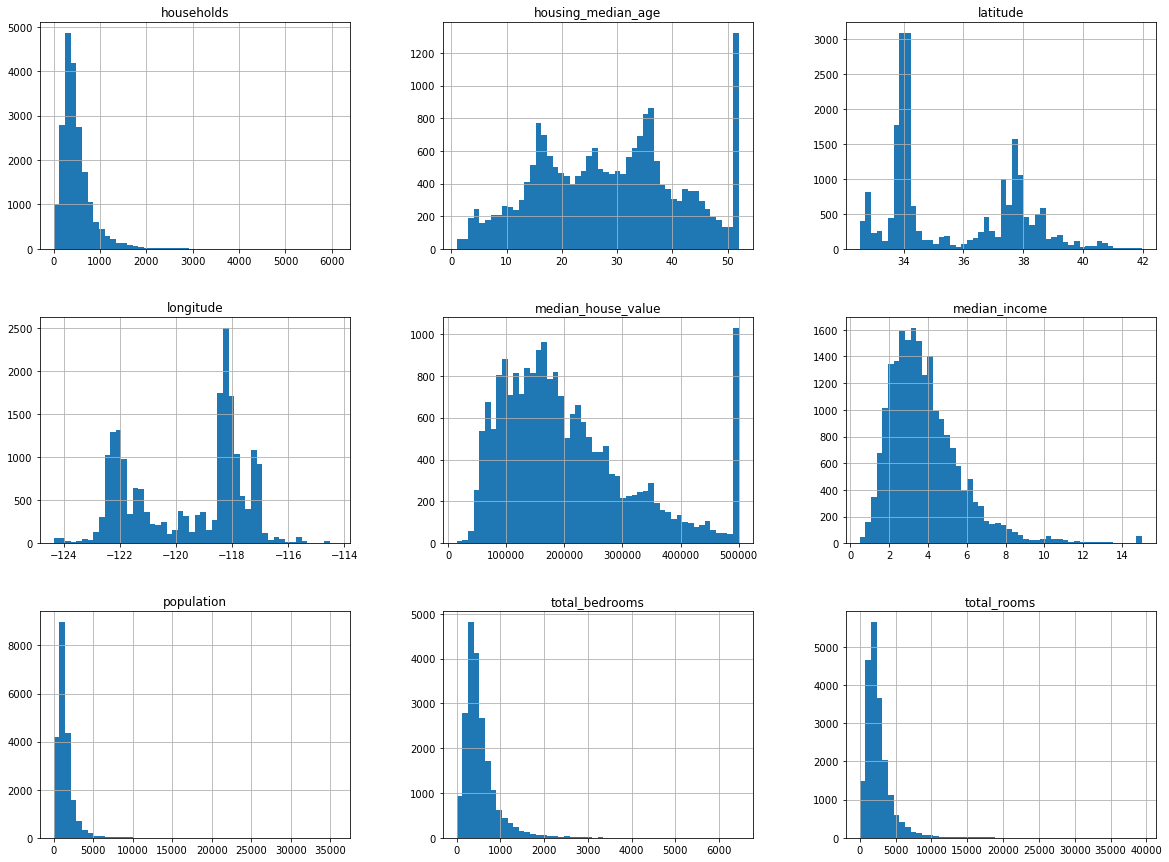

In [5]:
table.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
# function to split training set and test set
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[test_indices], data.iloc[train_indices]

In [7]:
test, train = split_train_test(table, 0.2)
print(len(test), len(train))

4128 16512


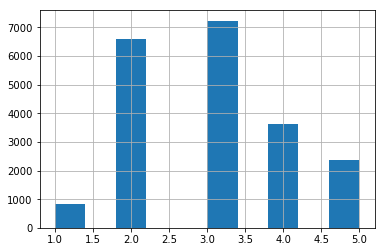

In [8]:
table["income_cat"] = np.ceil(table['median_income'] / 1.5)
table["income_cat"].where(table['income_cat'] < 5, 5.0, inplace=True)
table["income_cat"].hist()

In [9]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(table, table["income_cat"]):
    strat_train_set = table.loc[train_index]
    strat_test_set = table.loc[test_index]
print(table["income_cat"].value_counts() / len(table))

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64


In [10]:
if 'income_cat' in strat_test_set: strat_test_set = strat_test_set.drop('income_cat', 1)
if 'income_cat' in table: table = table.drop('income_cat', 1)
if 'income_cat' in strat_train_set: strat_train_set = strat_train_set.drop('income_cat', 1)

In [11]:
train = strat_test_set.copy()

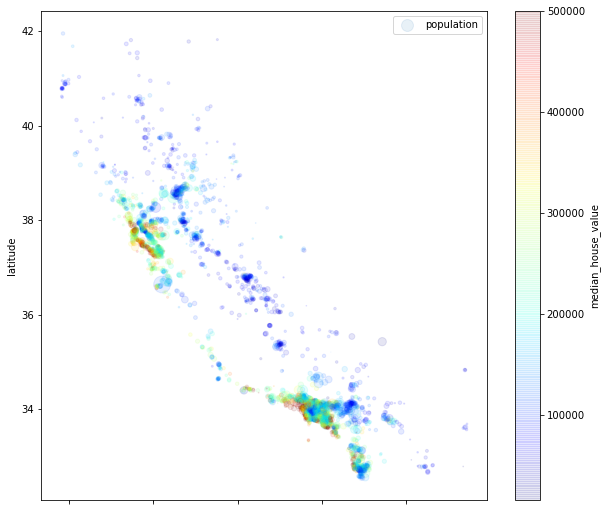

In [12]:
train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, s=train['population']/100,
           label='population', figsize=(10,9), c='median_house_value', cmap=plt.get_cmap("jet"),colorbar=True)



In [13]:
# this computes the negative or positive linear relationship between our features
corr_matrix = train.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691831
total_rooms           0.131435
housing_median_age    0.071357
households            0.071242
total_bedrooms        0.057568
population           -0.016033
longitude            -0.039987
latitude             -0.150124
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E03502A4E0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001E033A7EE10>]], dtype=object)

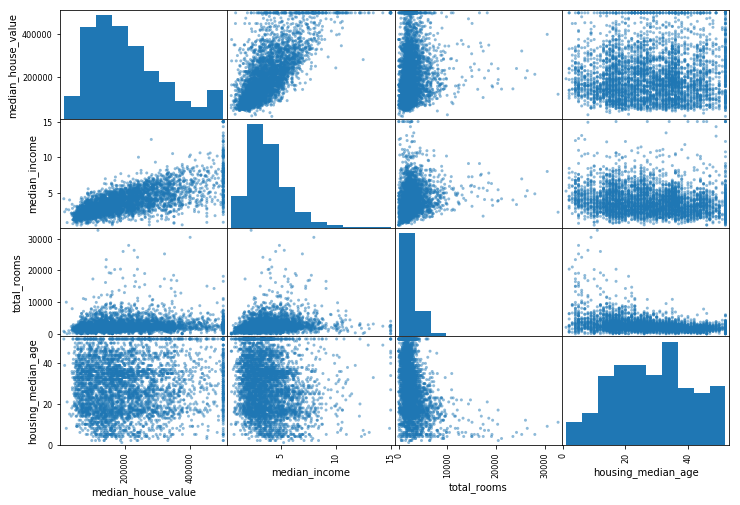

In [14]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms',
             'housing_median_age']

scatter_matrix(train[attributes], figsize=(12, 8))

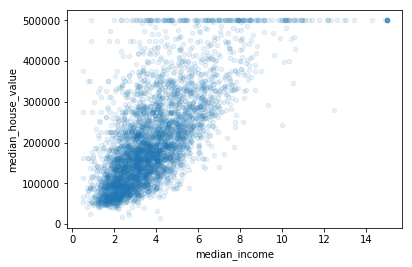

In [15]:
train.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

In [16]:
# we can create new features
train['rooms_per_household'] = train['total_rooms']/train["households"]
train['bedrooms_per_room'] = train["total_bedrooms"]/train["total_rooms"]
train["population_per_household"] = train["population"]/train["households"]

In [17]:
corr_matrix = train.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.691831
rooms_per_household         0.192575
total_rooms                 0.131435
housing_median_age          0.071357
households                  0.071242
total_bedrooms              0.057568
population                 -0.016033
longitude                  -0.039987
population_per_household   -0.135142
latitude                   -0.150124
bedrooms_per_room          -0.240362
Name: median_house_value, dtype: float64

In [18]:
trainX = train.drop("median_house_value", axis=1)
trainY = train["median_house_value"].copy()

trainX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 5241 to 2398
Data columns (total 12 columns):
longitude                   4128 non-null float64
latitude                    4128 non-null float64
housing_median_age          4128 non-null float64
total_rooms                 4128 non-null float64
total_bedrooms              4079 non-null float64
population                  4128 non-null float64
households                  4128 non-null float64
median_income               4128 non-null float64
ocean_proximity             4128 non-null object
rooms_per_household         4128 non-null float64
bedrooms_per_room           4079 non-null float64
population_per_household    4128 non-null float64
dtypes: float64(11), object(1)
memory usage: 579.2+ KB


In [19]:
# this is used to fill in any gaps we might have in our data
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")

housing_num = trainX.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
x = imputer.transform(housing_num)

In [20]:
trainX = pd.DataFrame(x, columns=housing_num.columns)

In [21]:
# we use the LabelEncoder to change strings to numbers
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
ocean = train["ocean_proximity"]
ocean_encoded = encoder.fit_transform(ocean)
print(ocean_encoded.reshape(-1,1).shape)
print(encoder.classes_)

(4128, 1)
['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [22]:
# We converted the strings to number but the distance between values is meaningless
# therefore we must create a one-hot vector for each of them
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
ocean_1hot = encoder.fit_transform(ocean_encoded.reshape(-1,1))


In [23]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
ocean_1hot = encoder.fit_transform(ocean)
ocean_1hot.shape

(4128, 5)

In [26]:
from sklearn.base import BaseEstimator,TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): 
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[: rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
    ('imputer', Imputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipepline.fit_transform(housing_num)

NameError: name 'num_pipepline' is not defined

In [ ]:
train.head(1)